# Principle Component Analysis
Next I applies PCA to the 10 examples in an attempt to visualize diffrences between reduced subreddit content vectors in 3-dimensional and 2-dimensional space. The code below uses color_map and a loop for plotting each sub in order to preserve correspondence between individual subs and plotted points

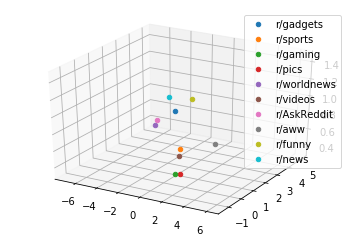

In [5]:
#%matplotlib notebook
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

count_set = pd.read_csv('../data/counts.csv')
feature_set = pd.read_csv('../data/data.csv')

X = np.transpose(feature_set.values)
m = X.shape[0]

def dim_reduce(dim):
    covar_mat = np.dot(np.transpose(X),X) / m
    U, S, V = linalg.svd(covar_mat)
    U_reduce = U[:,0:dim]
    Z_all = np.dot(X,U_reduce)
    return Z_all

def plot_reductions_3d(vecs):
    color_map = {}
    color_map['colors']=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    color_map['names']=['r/gadgets','r/sports','r/gaming','r/pics','r/worldnews','r/videos','r/AskReddit','r/aww','r/funny','r/news']
    ax = plt.axes(projection='3d')
    x = vecs[:,0]
    y = vecs[:,1]
    z = vecs[:,2]
    for i in range(0,10):
        ax.scatter(x[i], y[i], z[i], c=color_map['colors'][i], label=color_map['names'][i])
    plt.legend()
    plt.show()
    
vecs_reduce = dim_reduce(3)
plot_reductions_3d(vecs_reduce)

There don't appear to be any obvious relationships at this level of dimensionality reduction, but there are some clusters, which is interesting to see with this few examples. Here is the data in 2d:

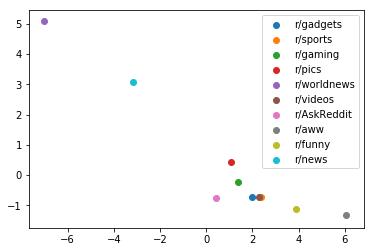

In [8]:
def plot_reductions_2d(vecs):
    color_map = {}
    color_map['colors']=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    color_map['names']=['r/gadgets','r/sports','r/gaming','r/pics','r/worldnews','r/videos','r/AskReddit','r/aww','r/funny','r/news']
    x = vecs[:,0]
    y = vecs[:,1]
    for i in range(0,10):
        plt.scatter(x[i], y[i], c=color_map['colors'][i], label=color_map['names'][i])
    plt.legend()
    plt.show()
    
vecs_reduce = dim_reduce(2)
plot_reductions_2d(vecs_reduce)

At this point it seems wise to run some variance retention analysis to determine if doing stuff with the reduced data will not be total nonsense.